<a href="https://colab.research.google.com/github/sbawari20/Stock-Prices-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
!pip install yfinance
import yfinance as yf
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-28 00:00:00-05:00,246.080002,246.649994,240.800003,241.759995,24778200,0.0,0.0
2022-11-29 00:00:00-05:00,241.399994,242.789993,238.210007,240.330002,17956300,0.0,0.0
2022-11-30 00:00:00-05:00,240.570007,255.330002,239.860001,255.139999,47553800,0.0,0.0


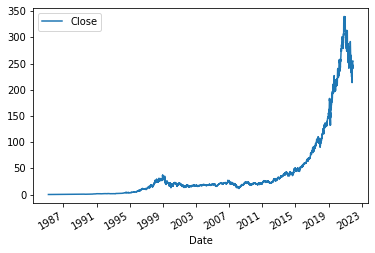

In [10]:
msft_hist.plot(y="Close", use_index=True)

In [40]:
data = msft_hist[["Close"]]
data = data.rename(columns={"Close":"Actual_Close"})
data["Target"] = msft_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
data.head()

,Actual_Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060809,NaN
1986-03-14 00:00:00-05:00,0.062980,1.0
1986-03-17 00:00:00-05:00,0.064067,1.0
1986-03-18 00:00:00-05:00,0.062437,0.0
1986-03-19 00:00:00-05:00,0.061351,0.0


In [41]:
msft_prev=msft_hist.copy()
msft_prev=msft_prev.shift(1)
predictors=["Close","Open", "High","Low","Volume"]
data=data.join(msft_prev[predictors]).iloc[1:]
data

,Actual_Close,Target,Close,Open,High,Low,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062980,1.0,0.060809,0.055380,0.063524,0.055380,1.031789e+09
1986-03-17 00:00:00-05:00,0.064067,1.0,0.062980,0.060809,0.064067,0.060809,3.081600e+08
1986-03-18 00:00:00-05:00,0.062437,0.0,0.064067,0.062980,0.064609,0.062980,1.331712e+08
1986-03-19 00:00:00-05:00,0.061351,0.0,0.062437,0.064067,0.064609,0.061894,6.776640e+07
1986-03-20 00:00:00-05:00,0.059723,0.0,0.061351,0.062437,0.062980,0.060809,4.789440e+07
...,...,...,...,...,...,...,...
2022-11-28 00:00:00-05:00,241.759995,0.0,247.490005,247.309998,248.699997,246.729996,9.200800e+06
2022-11-29 00:00:00-05:00,240.330002,0.0,241.759995,246.080002,246.649994,240.800003,2.477820e+07
2022-11-30 00:00:00-05:00,255.139999,1.0,240.330002,241.399994,242.789993,238.210007,1.795630e+07


In [42]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [43]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4931506849315068

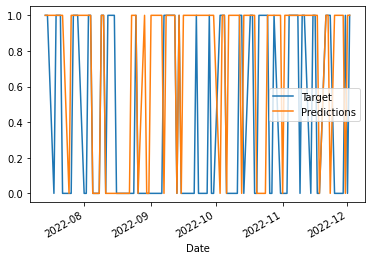

In [44]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()


In [45]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        
        model.fit(train[predictors], train["Target"])
        
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0
        
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
        
        predictions.append(combined)
    
    return pd.concat(predictions)

In [46]:
predictions = backtest(data, model, predictors)
predictions["Predictions"].value_counts()


0.0    7535
1.0     722
Name: Predictions, dtype: int64

In [47]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5041551246537396

In [48]:
weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()
weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [49]:
data.head()

,Actual_Close,Target,Close,Open,High,Low,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062980,1.0,0.060809,0.055380,0.063524,0.055380,1.031789e+09
1986-03-17 00:00:00-05:00,0.064067,1.0,0.062980,0.060809,0.064067,0.060809,3.081600e+08
1986-03-18 00:00:00-05:00,0.062437,0.0,0.064067,0.062980,0.064609,0.062980,1.331712e+08
1986-03-19 00:00:00-05:00,0.061351,0.0,0.062437,0.064067,0.064609,0.061894,6.776640e+07
1986-03-20 00:00:00-05:00,0.059723,0.0,0.061351,0.062437,0.062980,0.060809,4.789440e+07


In [50]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [51]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [52]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5617529880478087

In [53]:
predictions["Predictions"].value_counts()

0.0    7641
1.0     251
Name: Predictions, dtype: int64

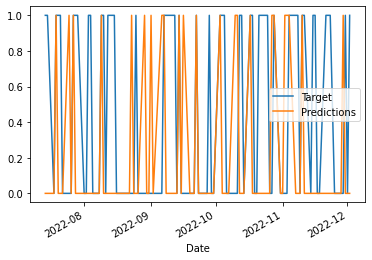

In [54]:
predictions.iloc[-100:].plot()